In [1]:
# Basic Imports
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load CSV file
penguins = pd.read_csv("penguins.csv")

In [3]:
# This is just to have a look at the data
# Should be deleted later
penguins.sample(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
214,Gentoo,Biscoe,46.1,13.2,211,4500,FEMALE
223,Gentoo,Biscoe,46.8,15.4,215,5150,MALE
289,Gentoo,Biscoe,51.1,16.3,220,6000,MALE
244,Gentoo,Biscoe,42.8,14.2,209,4700,FEMALE
282,Gentoo,Biscoe,47.7,15.0,216,4750,FEMALE


In [4]:
# Percentages of each output class ---needs to be sent to .gif file
penguins['species'].value_counts(normalize=True) * 100

species
Adelie       43.843844
Gentoo       35.735736
Chinstrap    20.420420
Name: proportion, dtype: float64

In [5]:
# Sci-kit learn imports
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [9]:
# Convert dataset to numpy array and split into features/target
penguins_dataset = penguins.to_numpy()
X = penguins_dataset[:, 1:7]
y = penguins_dataset[:, 0]

In [10]:
# Convert features to 1-hot vectors
le = preprocessing.LabelEncoder()
for feature in [0,5]:
    X[:,feature] = le.fit_transform(X[:,feature])

[Text(0.5714285714285714, 0.9166666666666666, 'x[3] <= 207.5\ngini = 0.646\nsamples = 266\nvalue = [107, 58, 101]'),
 Text(0.35714285714285715, 0.75, 'x[1] <= 44.65\ngini = 0.455\nsamples = 160\nvalue = [105, 54, 1]'),
 Text(0.14285714285714285, 0.5833333333333334, 'x[1] <= 42.35\ngini = 0.056\nsamples = 105\nvalue = [102, 3, 0]'),
 Text(0.07142857142857142, 0.4166666666666667, 'gini = 0.0\nsamples = 96\nvalue = [96, 0, 0]'),
 Text(0.21428571428571427, 0.4166666666666667, 'x[5] <= 0.5\ngini = 0.444\nsamples = 9\nvalue = [6, 3, 0]'),
 Text(0.14285714285714285, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.2857142857142857, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.5714285714285714, 0.5833333333333334, 'x[0] <= 1.5\ngini = 0.137\nsamples = 55\nvalue = [3, 51, 1]'),
 Text(0.5, 0.4166666666666667, 'x[0] <= 0.5\ngini = 0.073\nsamples = 53\nvalue = [1, 51, 1]'),
 Text(0.42857142857142855, 0.25, 'x[1] <= 47.0\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Te

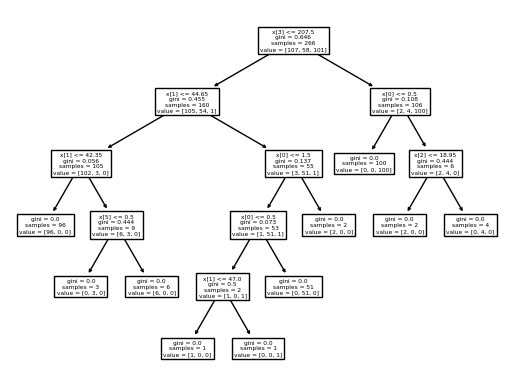

In [18]:
# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Base DT
tree.plot_tree(dtc)

In [ ]:
# Top DT --incomplete
# To-do: Mess with values and display new tree
tree_para = {'criterion':['gini','entropy'],'max_depth':['None',4,8], 'min_samples_split':[5,10]}
clf = GridSearchCV(dtc, tree_para)
clf.fit(X_train,y_train)
clf.best_estimator_